In [1]:
!pip install chainer
!pip install numpy==1.16.1
!pip install pyxDamerauLevenshtein==1.5.2
!pip install pyLDAvis==2.1.2
!pip install spacy
!python -m spacy download es
!python -m spacy download en

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/ho

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/en_core_web_sm
-->
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
from lda2vec import preprocess, corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

You must be using a very recent version of pyLDAvis to use the lda2vec outputs. 
As of this writing, anything past Jan 6 2016 or this commit `14e7b5f60d8360eb84969ff08a1b77b365a5878e` should work.
You can do this quickly by installing it directly from master like so:


In [ ]:
# pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis

In [3]:
import pyLDAvis
pyLDAvis.enable_notebook()

### Reading in the saved model topics

After runnning `lda2vec_run.py` script in `examples/twenty_newsgroups/lda2vec` directory a `topics.pyldavis.npz` will be created that contains the topic-to-word probabilities and frequencies. What's left is to visualize and label each topic from the it's prevalent words.

In [5]:
#npz = np.load(open('topics.pyldavis.npz', 'r'))
npz = np.load(open('topics.pyldavis.npz', 'rb'), allow_pickle=True)
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: NpzFile.iteritems is deprecated in python 3, to match the removal of dict.itertems. Use .items() instead.
  app.launch_new_instance()


In [7]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

### Visualize topics

In [8]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [9]:
pyLDAvis.display(prepared_data)

### 'True' topics

The 20 newsgroups dataset is interesting because users effetively classify the topics by posting to a particular newsgroup. This lets us qualitatively check our unsupervised topics with the 'true' labels. For example, the four topics we highlighted above are intuitively close to comp.graphics, sci.med, talk.politics.misc, and sci.space.

    comp.graphics
    comp.os.ms-windows.misc
    comp.sys.ibm.pc.hardware
    comp.sys.mac.hardware
    comp.windows.x    
    rec.autos
    rec.motorcycles
    rec.sport.baseball
    rec.sport.hockey    
    sci.crypt
    sci.electronics
    sci.med
    sci.space
    misc.forsale    
    talk.politics.misc
    talk.politics.guns
    talk.politics.mideast    
    talk.religion.misc
    alt.atheism
    soc.religion.christian

### Individual document topics

In [10]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

#### First Example

In [12]:
print(texts[1])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.


In [14]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

07% in topic 01 which has top words bike, tire, honda, battery, brake, ride, valve, aluminum, intake, jeep
02% in topic 03 which has top words shuttle, nasa, space, payload, computational, planetary, satellite, mission, launch, lunar
24% in topic 05 which has top words drive, controller, battery, dock, connector, ink, card, slot, pin, vram
05% in topic 11 which has top words widget, server, contrib, font, editor, format, mit, pixmap, toolkit, binary
23% in topic 12 which has top words controller, card, disk, bios, rom, vram, drive, isa, vga, trident
22% in topic 13 which has top words cd, shuttle, sale, frequency, antenna, disc, space, shipping, offer, model
12% in topic 19 which has top words font, icon, window, server, editor, format, disk, card, terminal, i


<BarContainer object of 20 artists>

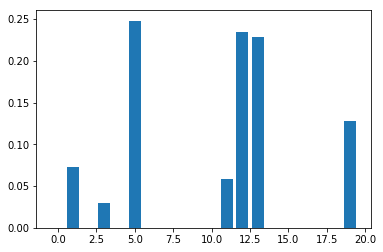

In [15]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

#### Second Example

In [16]:
print(texts[51])

I have been following this thread on talk.religion,
soc.religion.christian.bible-study and here with interest.  I am amazed at
the different non-biblical argument those who oppose the Sabbath present. 

One question comes to mind, especially since my last one was not answered
from Scripture.  Maybe clh may wish to provide the first response.

There is a lot of talk about the Sabbath of the TC being ceremonial. 
Answer this:

Since the TC commandments is one law with ten parts on what biblical
basis have you decided that only the Sabbath portion is ceremonial?
OR You say that the seventh-day is the Sabbath but not applicable to
Gentile Christians.  Does that mean the Sabbath commandment has been
annulled?  References please.

If God did not intend His requirements on the Jews to be applicable to
Gentile Christians why did He make it plain that the Gentiles were now
grafted into the commonwealth of Israel?

Darius


In [17]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][51]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

50% in topic 00 which has top words jesus, god, orthodox, faith, verse, worship, belief, christianity, christian, mormon
47% in topic 17 which has top words jesus, messiah, verse, orthodox, god, psalm, apostle, faith, luke, divine
01% in topic 18 which has top words quack, blood, lyme, jesus, infant, orthodox, substance, god, candida, msg


<BarContainer object of 20 artists>

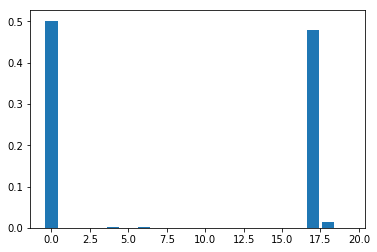

In [18]:
plt.bar(np.arange(20), dat['doc_topic_dists'][51])